In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt

<br><br>
## 1. Leitura dos dados

In [2]:
filmes = pd.read_csv("dataset_v2.csv", sep=";")

In [3]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        16890 non-null  int64  
 1   year                        16890 non-null  int64  
 2   title_name                  16890 non-null  object 
 3   title_id                    16890 non-null  object 
 4   distributor                 16528 non-null  object 
 5   runtime                     16835 non-null  float64
 6   release_day                 16890 non-null  int64  
 7   release_month               16890 non-null  int64  
 8   release_year                16890 non-null  int64  
 9    worldwide_gross            16890 non-null  object 
 10   domestic_gross             16890 non-null  object 
 11   foreign_gross              8990 non-null   object 
 12   opening_gross              14942 non-null  object 
 13   budget                     393

In [4]:
filmes.head()

,rank,year,title_name,title_id,distributor,runtime,release_day,release_month,release_year,worldwide_gross,...,country,awards,rating_value_imdb,rating_count_imdb,rating_value_metacritic,rating_count_metacritic,rating_value_tomatometer,rating_count_tomatometer,rating_value_audiencescore,rating_count_audiencescore
0,1,2015,star wars episode vii the force awakens,tt2488496,walt disney studios motion pictures,138.0,16,12,2015,"$2.068.223.624,00",...,usa,nominated for 5 oscars. another 63 wins & 125 ...,7.9,828054.0,81.0,54.0,93.0,430.0,86.0,233713.0
1,2,2019,avengers endgame,tt4154796,walt disney studios motion pictures,181.0,24,4,2019,"$2.797.800.564,00",...,usa,nominated for 1 oscar. another 46 wins & 97 no...,8.5,677671.0,78.0,57.0,94.0,505.0,90.0,68583.0
2,3,2009,avatar,tt0499549,twentieth century fox,162.0,16,12,2009,"$2.790.439.000,00",...,usa,won 3 oscars. another 86 wins & 129 nominations.,7.8,1080448.0,83.0,35.0,82.0,316.0,82.0,1382227.0
3,2332,1954,rear window,tt0047396,paramount pictures,112.0,1,8,1954,"$37.032.034,00",...,usa,nominated for 4 oscars. another 6 wins & 9 nom...,8.4,417751.0,100.0,18.0,100.0,66.0,95.0,150635.0
4,7351,1941,citizen kane,tt0033467,rko radio pictures,119.0,1,5,1941,"$1.594.107,00",...,usa,won 1 oscar. another 9 wins & 13 nominations.,8.3,377651.0,100.0,19.0,100.0,84.0,90.0,158976.0


In [5]:
filmes.isnull().sum()

rank                              0
year                              0
title_name                        0
title_id                          0
distributor                     362
runtime                          55
release_day                       0
release_month                     0
release_year                      0
 worldwide_gross                  0
 domestic_gross                   0
 foreign_gross                 7900
 opening_gross                 1948
 budget                       12955
genres                            3
director                          1
writer                            1
cast                              1
production                        1
rated                          1523
plot                              1
language                          1
country                           1
awards                         3750
rating_value_imdb                 8
rating_count_imdb                 8
rating_value_metacritic        4839
rating_count_metacritic     

<br><br>
## 2. Tratamento e limpeza dos dados

In [6]:
filmes.columns

Index(['rank', 'year', 'title_name', 'title_id', 'distributor', 'runtime',
       'release_day', 'release_month', 'release_year', ' worldwide_gross ',
       ' domestic_gross ', ' foreign_gross ', ' opening_gross ', ' budget ',
       'genres', 'director', 'writer', 'cast', 'production', 'rated', 'plot',
       'language', 'country', 'awards', 'rating_value_imdb',
       'rating_count_imdb', 'rating_value_metacritic',
       'rating_count_metacritic', 'rating_value_tomatometer',
       'rating_count_tomatometer', 'rating_value_audiencescore',
       'rating_count_audiencescore'],
      dtype='object')

In [7]:
# algumas colunas vieram com espaços sobressalentes no nome
# o método strip() remove todos os leading spaces e trailing spaces da string
filmes.columns = filmes.columns.str.strip()

In [8]:
# essa análise permite ver que toda linha tem pelo menos um valor nulo, então é necessário tratar
filmes[filmes.isnull().any(axis='columns')]

,rank,year,title_name,title_id,distributor,runtime,release_day,release_month,release_year,worldwide_gross,...,country,awards,rating_value_imdb,rating_count_imdb,rating_value_metacritic,rating_count_metacritic,rating_value_tomatometer,rating_count_tomatometer,rating_value_audiencescore,rating_count_audiencescore
3,2332,1954,rear window,tt0047396,paramount pictures,112.0,1,8,1954,"$37.032.034,00",...,usa,nominated for 4 oscars. another 6 wins & 9 nom...,8.4,417751.0,100.0,18.0,100.0,66.0,95.0,150635.0
4,7351,1941,citizen kane,tt0033467,rko radio pictures,119.0,1,5,1941,"$1.594.107,00",...,usa,won 1 oscar. another 9 wins & 13 nominations.,8.3,377651.0,100.0,19.0,100.0,84.0,90.0,158976.0
9,1914,1962,lawrence of arabia,tt0056172,columbia pictures,228.0,21,12,1962,"$45.710.874,00",...,uk,won 7 oscars. another 23 wins & 14 nominations.,8.3,253239.0,100.0,8.0,98.0,85.0,93.0,74997.0
13,5391,1983,fanny and alexander,tt0083922,embassy pictures,188.0,17,6,1983,"$6.795.771,00",...,"sweden,france,west,germany",won 4 oscars. another 21 wins & 11 nominations.,8.1,53956.0,100.0,8.0,100.0,37.0,94.0,21354.0
15,6283,1994,three colors red,tt0111495,miramax,99.0,1,12,1994,"$3.581.969,00",...,"switzerland,france,poland",nominated for 3 oscars. another 19 wins & 25 n...,8.1,83797.0,100.0,9.0,100.0,52.0,95.0,35554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,8457,1991,the british invasion returns,tt0279706,expanded entertainment,105.0,1,3,1991,"$729.102,00",...,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16886,16398,2011,building hope,tt1845213,the nobelity project,70.0,3,6,2011,"$4.000,00",...,"usa,kenya",1 win.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16887,13860,2009,runaways,tt1339588,slowhand cinema releasing,88.0,5,12,2008,"$30.032,00",...,mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16888,16588,2013,approximately nels cline,tt2110394,first run,27.0,16,8,2013,"$3.066,00",...,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# existem algumas linhas duplicadas por algum motivo; o drop_duplicates vai manter somente a primeira entrada de um title_id (que é único entre os filmes)
filmes.drop_duplicates(subset=['title_id'], keep='first', inplace=True)

In [10]:
filmes

,rank,year,title_name,title_id,distributor,runtime,release_day,release_month,release_year,worldwide_gross,...,country,awards,rating_value_imdb,rating_count_imdb,rating_value_metacritic,rating_count_metacritic,rating_value_tomatometer,rating_count_tomatometer,rating_value_audiencescore,rating_count_audiencescore
0,1,2015,star wars episode vii the force awakens,tt2488496,walt disney studios motion pictures,138.0,16,12,2015,"$2.068.223.624,00",...,usa,nominated for 5 oscars. another 63 wins & 125 ...,7.9,828054.0,81.0,54.0,93.0,430.0,86.0,233713.0
1,2,2019,avengers endgame,tt4154796,walt disney studios motion pictures,181.0,24,4,2019,"$2.797.800.564,00",...,usa,nominated for 1 oscar. another 46 wins & 97 no...,8.5,677671.0,78.0,57.0,94.0,505.0,90.0,68583.0
2,3,2009,avatar,tt0499549,twentieth century fox,162.0,16,12,2009,"$2.790.439.000,00",...,usa,won 3 oscars. another 86 wins & 129 nominations.,7.8,1080448.0,83.0,35.0,82.0,316.0,82.0,1382227.0
3,2332,1954,rear window,tt0047396,paramount pictures,112.0,1,8,1954,"$37.032.034,00",...,usa,nominated for 4 oscars. another 6 wins & 9 nom...,8.4,417751.0,100.0,18.0,100.0,66.0,95.0,150635.0
4,7351,1941,citizen kane,tt0033467,rko radio pictures,119.0,1,5,1941,"$1.594.107,00",...,usa,won 1 oscar. another 9 wins & 13 nominations.,8.3,377651.0,100.0,19.0,100.0,84.0,90.0,158976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,8457,1991,the british invasion returns,tt0279706,expanded entertainment,105.0,1,3,1991,"$729.102,00",...,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16886,16398,2011,building hope,tt1845213,the nobelity project,70.0,3,6,2011,"$4.000,00",...,"usa,kenya",1 win.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16887,13860,2009,runaways,tt1339588,slowhand cinema releasing,88.0,5,12,2008,"$30.032,00",...,mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16888,16588,2013,approximately nels cline,tt2110394,first run,27.0,16,8,2013,"$3.066,00",...,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
filmes.reset_index().iloc[:,3:]

,title_name,title_id,distributor,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,...,country,awards,rating_value_imdb,rating_count_imdb,rating_value_metacritic,rating_count_metacritic,rating_value_tomatometer,rating_count_tomatometer,rating_value_audiencescore,rating_count_audiencescore
0,star wars episode vii the force awakens,tt2488496,walt disney studios motion pictures,138.0,16,12,2015,"$2.068.223.624,00","$936.662.225,00","$1.131.561.399,00",...,usa,nominated for 5 oscars. another 63 wins & 125 ...,7.9,828054.0,81.0,54.0,93.0,430.0,86.0,233713.0
1,avengers endgame,tt4154796,walt disney studios motion pictures,181.0,24,4,2019,"$2.797.800.564,00","$858.373.000,00","$1.939.427.564,00",...,usa,nominated for 1 oscar. another 46 wins & 97 no...,8.5,677671.0,78.0,57.0,94.0,505.0,90.0,68583.0
2,avatar,tt0499549,twentieth century fox,162.0,16,12,2009,"$2.790.439.000,00","$760.507.625,00","$2.029.931.375,00",...,usa,won 3 oscars. another 86 wins & 129 nominations.,7.8,1080448.0,83.0,35.0,82.0,316.0,82.0,1382227.0
3,rear window,tt0047396,paramount pictures,112.0,1,8,1954,"$37.032.034,00","$36.764.313,00","$267.721,00",...,usa,nominated for 4 oscars. another 6 wins & 9 nom...,8.4,417751.0,100.0,18.0,100.0,66.0,95.0,150635.0
4,citizen kane,tt0033467,rko radio pictures,119.0,1,5,1941,"$1.594.107,00","$1.585.634,00","$8.473,00",...,usa,won 1 oscar. another 9 wins & 13 nominations.,8.3,377651.0,100.0,19.0,100.0,84.0,90.0,158976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,the british invasion returns,tt0279706,expanded entertainment,105.0,1,3,1991,"$729.102,00","$729.102,00",NaN,...,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15631,building hope,tt1845213,the nobelity project,70.0,3,6,2011,"$4.000,00","$4.000,00",NaN,...,"usa,kenya",1 win.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15632,runaways,tt1339588,slowhand cinema releasing,88.0,5,12,2008,"$30.032,00","$27.908,00","$2.124,00",...,mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15633,approximately nels cline,tt2110394,first run,27.0,16,8,2013,"$3.066,00","$3.066,00",NaN,...,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
filmes.columns

Index(['rank', 'year', 'title_name', 'title_id', 'distributor', 'runtime',
       'release_day', 'release_month', 'release_year', 'worldwide_gross',
       'domestic_gross', 'foreign_gross', 'opening_gross', 'budget', 'genres',
       'director', 'writer', 'cast', 'production', 'rated', 'plot', 'language',
       'country', 'awards', 'rating_value_imdb', 'rating_count_imdb',
       'rating_value_metacritic', 'rating_count_metacritic',
       'rating_value_tomatometer', 'rating_count_tomatometer',
       'rating_value_audiencescore', 'rating_count_audiencescore'],
      dtype='object')

In [13]:
filmes.drop(['rank', 'year', 'distributor', 'director', 'writer', 'cast', 'plot', 'country', 'awards'], axis='columns')

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,rated,language,rating_value_imdb,rating_count_imdb,rating_value_metacritic,rating_count_metacritic,rating_value_tomatometer,rating_count_tomatometer,rating_value_audiencescore,rating_count_audiencescore
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,"$2.068.223.624,00","$936.662.225,00","$1.131.561.399,00","$247.966.675,00",...,pg-13,english,7.9,828054.0,81.0,54.0,93.0,430.0,86.0,233713.0
1,avengers endgame,tt4154796,181.0,24,4,2019,"$2.797.800.564,00","$858.373.000,00","$1.939.427.564,00","$357.115.007,00",...,pg-13,"english,japanese,xhosa,german",8.5,677671.0,78.0,57.0,94.0,505.0,90.0,68583.0
2,avatar,tt0499549,162.0,16,12,2009,"$2.790.439.000,00","$760.507.625,00","$2.029.931.375,00","$77.025.481,00",...,pg-13,"english,spanish",7.8,1080448.0,83.0,35.0,82.0,316.0,82.0,1382227.0
3,rear window,tt0047396,112.0,1,8,1954,"$37.032.034,00","$36.764.313,00","$267.721,00",NaN,...,pg,english,8.4,417751.0,100.0,18.0,100.0,66.0,95.0,150635.0
4,citizen kane,tt0033467,119.0,1,5,1941,"$1.594.107,00","$1.585.634,00","$8.473,00",NaN,...,pg,"english,italian",8.3,377651.0,100.0,19.0,100.0,84.0,90.0,158976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,the british invasion returns,tt0279706,105.0,1,3,1991,"$729.102,00","$729.102,00",NaN,NaN,...,NaN,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16886,building hope,tt1845213,70.0,3,6,2011,"$4.000,00","$4.000,00",NaN,"$3.500,00",...,NaN,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16887,runaways,tt1339588,88.0,5,12,2008,"$30.032,00","$27.908,00","$2.124,00","$22.997,00",...,r,spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16888,approximately nels cline,tt2110394,27.0,16,8,2013,"$3.066,00","$3.066,00",NaN,"$1.119,00",...,NaN,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
filmes_final = filmes.drop(['rank', 'year', 'production', 'distributor', 'director', 'writer', 'cast', 'plot', 'country', 'awards',
                                              'rating_value_imdb', 'rating_count_imdb', 'rating_value_metacritic',
       'rating_count_metacritic', 'rating_value_tomatometer',
       'rating_count_tomatometer', 'rating_value_audiencescore',
       'rating_count_audiencescore'], axis='columns').copy()

In [15]:
filmes_final['worldwide_gross'] = filmes_final['worldwide_gross'].str.replace('$', '').str.replace(',00', '').str.replace('.', '').str.replace(' ', '').fillna(0).astype('int64')
filmes_final['foreign_gross'] = filmes_final['foreign_gross'].str.replace('$', '').str.replace(',00', '').str.replace('.', '').str.replace(' ', '').fillna(0).astype('int64')
filmes_final['domestic_gross'] = filmes_final['domestic_gross'].str.replace('$', '').str.replace(',00', '').str.replace('.', '').str.replace(' ', '').fillna(0).astype('int64')
filmes_final['opening_gross'] = filmes_final['opening_gross'].str.replace('$', '').str.replace(',00', '').str.replace('.', '').str.replace(' ', '').fillna(0).astype('int64')

In [16]:
filmes_final.isnull().sum()

title_name             0
title_id               0
runtime               51
release_day            0
release_month          0
release_year           0
worldwide_gross        0
domestic_gross         0
foreign_gross          0
opening_gross          0
budget             11774
genres                 3
rated               1361
language               1
dtype: int64

In [17]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,rated,language
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,"$245.000.000,00","action,adventure,scifi",pg-13,english
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,"$356.000.000,00","action,adventure,drama,scifi",pg-13,"english,japanese,xhosa,german"
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,"$237.000.000,00","action,adventure,fantasy,scifi",pg-13,"english,spanish"
3,rear window,tt0047396,112.0,1,8,1954,37032034,36764313,267721,0,NaN,"mystery,thriller",pg,english
4,citizen kane,tt0033467,119.0,1,5,1941,1594107,1585634,8473,0,NaN,"drama,mystery",pg,"english,italian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,the british invasion returns,tt0279706,105.0,1,3,1991,729102,729102,0,0,NaN,music,NaN,english
16886,building hope,tt1845213,70.0,3,6,2011,4000,4000,0,3500,NaN,"documentary,family",NaN,english
16887,runaways,tt1339588,88.0,5,12,2008,30032,27908,2124,22997,NaN,action,r,spanish
16888,approximately nels cline,tt2110394,27.0,16,8,2013,3066,3066,0,1119,NaN,"biography,documentary,music,short",NaN,english


In [18]:
filmes_final[filmes_final.isnull().any(axis='columns')]

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,rated,language
3,rear window,tt0047396,112.0,1,8,1954,37032034,36764313,267721,0,NaN,"mystery,thriller",pg,english
4,citizen kane,tt0033467,119.0,1,5,1941,1594107,1585634,8473,0,NaN,"drama,mystery",pg,"english,italian"
13,fanny and alexander,tt0083922,188.0,17,6,1983,6795771,6783304,12467,0,NaN,drama,r,"swedish,german,yiddish,english,french"
15,three colors red,tt0111495,99.0,1,12,1994,3581969,3581969,0,0,NaN,"drama,mystery,romance",r,french
16,au hasard balthazar,tt0060138,95.0,17,10,2003,45406,45406,0,8436,NaN,drama,not rated,"french,latin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16884,tvtv video revolutionaries,tt9150206,82.0,19,10,2018,812,812,0,556,NaN,documentary,NaN,english
16885,the british invasion returns,tt0279706,105.0,1,3,1991,729102,729102,0,0,NaN,music,NaN,english
16886,building hope,tt1845213,70.0,3,6,2011,4000,4000,0,3500,NaN,"documentary,family",NaN,english
16887,runaways,tt1339588,88.0,5,12,2008,30032,27908,2124,22997,NaN,action,r,spanish


In [19]:
filmes_final = filmes_final[~filmes_final.isnull().any(axis='columns')].copy()

In [20]:
filmes_final['budget'] = filmes_final['budget'].str.replace('$', '').str.replace(',00', '').str.replace('.', '').str.replace(' ', '').fillna(0).astype('int64')

In [21]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,rated,language
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,245000000,"action,adventure,scifi",pg-13,english
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,356000000,"action,adventure,drama,scifi",pg-13,"english,japanese,xhosa,german"
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,237000000,"action,adventure,fantasy,scifi",pg-13,"english,spanish"
5,titanic,tt0120338,194.0,18,12,1997,2194439542,659363944,1535075598,28638131,200000000,"drama,romance",pg-13,"english,swedish,italian"
6,jurassic world,tt0369610,124.0,10,6,2015,1670400637,652270625,1018130012,208806270,150000000,"action,adventure,scifi",pg-13,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,split a deeper divide,tt2382420,72.0,12,10,2012,2000,2000,0,2338,150000,documentary,not rated,english
16599,faqs,tt0396587,95.0,3,2,2006,1967,1967,0,1407,250000,drama,not rated,english
16674,the tunnel,tt1735485,90.0,5,8,2011,1532,1532,0,507,135000,"horror,mystery,thriller",not rated,english
16781,high strung,tt0102032,93.0,4,12,1992,904,904,0,718,300000,comedy,pg,english


In [22]:
filmes_final.isnull().any(axis='columns').sum()

0

### Filtro de ano (ano >= 2000)

In [23]:
filmes_final = filmes_final[filmes_final['release_year'].apply(lambda x: x>=2000 and x<2020)].copy()
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,rated,language
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,245000000,"action,adventure,scifi",pg-13,english
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,356000000,"action,adventure,drama,scifi",pg-13,"english,japanese,xhosa,german"
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,237000000,"action,adventure,fantasy,scifi",pg-13,"english,spanish"
6,jurassic world,tt0369610,124.0,10,6,2015,1670400637,652270625,1018130012,208806270,150000000,"action,adventure,scifi",pg-13,english
7,the avengers,tt0848228,143.0,25,4,2012,1518812988,623357910,895455078,207438708,220000000,"action,adventure,scifi",pg-13,"english,russian,hindi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,side effects,tt0438427,90.0,9,9,2005,2216,2216,0,2216,30000000,"comedy,drama,romance",r,english
16593,split a deeper divide,tt2382420,72.0,12,10,2012,2000,2000,0,2338,150000,documentary,not rated,english
16599,faqs,tt0396587,95.0,3,2,2006,1967,1967,0,1407,250000,drama,not rated,english
16674,the tunnel,tt1735485,90.0,5,8,2011,1532,1532,0,507,135000,"horror,mystery,thriller",not rated,english


### Filtro de Opening Gross != 0

In [24]:
filmes_final = filmes_final[filmes_final['opening_gross'].apply(lambda x: x!=0)].copy()

In [25]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,rated,language
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,245000000,"action,adventure,scifi",pg-13,english
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,356000000,"action,adventure,drama,scifi",pg-13,"english,japanese,xhosa,german"
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,237000000,"action,adventure,fantasy,scifi",pg-13,"english,spanish"
6,jurassic world,tt0369610,124.0,10,6,2015,1670400637,652270625,1018130012,208806270,150000000,"action,adventure,scifi",pg-13,english
7,the avengers,tt0848228,143.0,25,4,2012,1518812988,623357910,895455078,207438708,220000000,"action,adventure,scifi",pg-13,"english,russian,hindi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,side effects,tt0438427,90.0,9,9,2005,2216,2216,0,2216,30000000,"comedy,drama,romance",r,english
16593,split a deeper divide,tt2382420,72.0,12,10,2012,2000,2000,0,2338,150000,documentary,not rated,english
16599,faqs,tt0396587,95.0,3,2,2006,1967,1967,0,1407,250000,drama,not rated,english
16674,the tunnel,tt1735485,90.0,5,8,2011,1532,1532,0,507,135000,"horror,mystery,thriller",not rated,english


<br><br>
### Coluna _rated_
Criação de campo categórico ordinal; é feito também um **filtro** para manter só as observações que possuam as 4 principais classificações indicativas.

In [26]:
df_temp_rated = filmes_final['rated'].apply(pd.Series).stack().to_frame('rated').groupby('rated').size().sort_values(ascending=False).head(10).to_frame('contagem').reset_index()
df_temp_rated

,rated,contagem
0,pg-13,1133
1,r,1039
2,pg,447
3,g,61
4,not rated,31
5,unrated,8
6,nc-17,5
7,tv-ma,1
8,approved,1


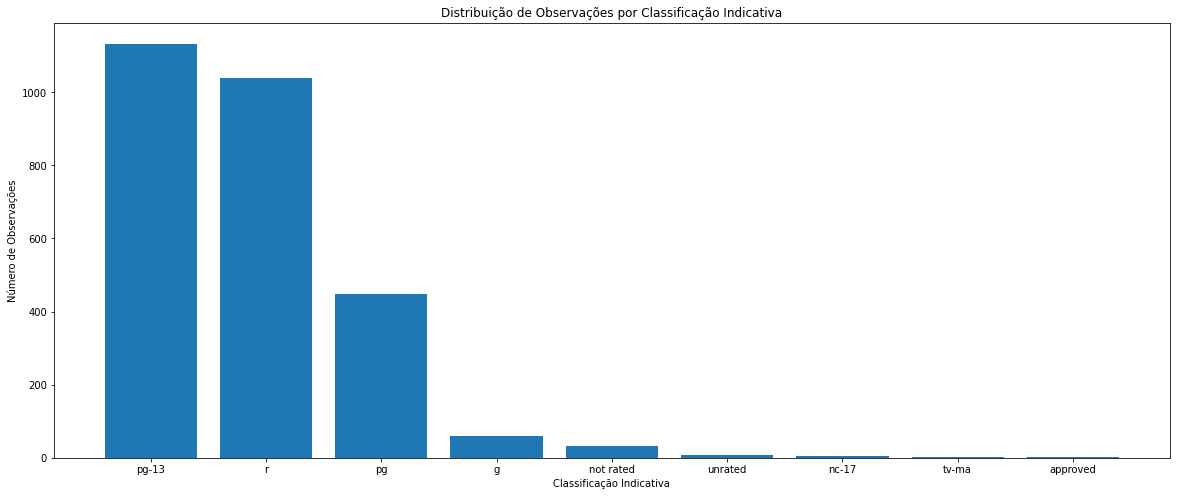

In [27]:
fig = plt.figure(figsize = (20, 8)) 
plt.bar(df_temp_rated['rated'], df_temp_rated['contagem'])
plt.xlabel("Classificação Indicativa") 
plt.ylabel("Número de Observações") 
plt.title("Distribuição de Observações por Classificação Indicativa") 
plt.show()

In [28]:
list_biggest_ratings = filmes_final['rated'].apply(pd.Series).stack().to_frame('rated').groupby('rated').size().sort_values(ascending=False).head(4).to_frame('contagem').reset_index()['rated'].to_list()
list_biggest_ratings

['pg-13', 'r', 'pg', 'g']

In [29]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,rated,language
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,245000000,"action,adventure,scifi",pg-13,english
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,356000000,"action,adventure,drama,scifi",pg-13,"english,japanese,xhosa,german"
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,237000000,"action,adventure,fantasy,scifi",pg-13,"english,spanish"
6,jurassic world,tt0369610,124.0,10,6,2015,1670400637,652270625,1018130012,208806270,150000000,"action,adventure,scifi",pg-13,english
7,the avengers,tt0848228,143.0,25,4,2012,1518812988,623357910,895455078,207438708,220000000,"action,adventure,scifi",pg-13,"english,russian,hindi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,side effects,tt0438427,90.0,9,9,2005,2216,2216,0,2216,30000000,"comedy,drama,romance",r,english
16593,split a deeper divide,tt2382420,72.0,12,10,2012,2000,2000,0,2338,150000,documentary,not rated,english
16599,faqs,tt0396587,95.0,3,2,2006,1967,1967,0,1407,250000,drama,not rated,english
16674,the tunnel,tt1735485,90.0,5,8,2011,1532,1532,0,507,135000,"horror,mystery,thriller",not rated,english


In [30]:
filmes_final = filmes_final[filmes_final['rated'].apply(lambda x: x in list_biggest_ratings)].copy()
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,rated,language
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,245000000,"action,adventure,scifi",pg-13,english
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,356000000,"action,adventure,drama,scifi",pg-13,"english,japanese,xhosa,german"
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,237000000,"action,adventure,fantasy,scifi",pg-13,"english,spanish"
6,jurassic world,tt0369610,124.0,10,6,2015,1670400637,652270625,1018130012,208806270,150000000,"action,adventure,scifi",pg-13,english
7,the avengers,tt0848228,143.0,25,4,2012,1518812988,623357910,895455078,207438708,220000000,"action,adventure,scifi",pg-13,"english,russian,hindi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109.0,6,5,2005,10514,10514,0,5199,300000,"drama,mystery,romance,sport",r,"english,spanish"
15274,down terrace,tt1489167,89.0,15,10,2010,9812,9812,0,3088,30000,"crime,drama",r,english
15365,the janky promoters,tt1210071,85.0,16,10,2009,9069,9069,0,5702,10000000,"comedy,crime,music",r,english
15551,scorched,tt0286947,95.0,30,5,2003,369194,8000,361194,8000,7000000,"comedy,crime",pg-13,english


In [31]:
filmes_final['rated'].apply(pd.Series).stack().to_frame('rated').groupby('rated').size().sort_values(ascending=False).head(10)

rated
pg-13    1133
r        1039
pg        447
g          61
dtype: int64

In [32]:
filmes_final['rated'].unique()

array(['pg-13', 'pg', 'g', 'r'], dtype=object)

In [33]:
filmes_final['rated'].to_frame().reset_index(drop=True)

,rated
0,pg-13
1,pg-13
2,pg-13
3,pg-13
4,pg-13
...,...
2675,r
2676,r
2677,r
2678,pg-13


In [34]:
filmes_final['age_rating'] = filmes_final['rated'].str.replace('pg-13', '3').str.replace('pg', '2').str.replace('g', '1').str.replace('r', '4').copy()

In [35]:
filmes_final['age_rating'].to_frame().reset_index(drop=True)

,age_rating
0,3
1,3
2,3
3,3
4,3
...,...
2675,4
2676,4
2677,4
2678,3


In [36]:
filmes_final = filmes_final.drop('rated', axis='columns').copy()

In [37]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,language,age_rating
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,245000000,"action,adventure,scifi",english,3
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,356000000,"action,adventure,drama,scifi","english,japanese,xhosa,german",3
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,237000000,"action,adventure,fantasy,scifi","english,spanish",3
6,jurassic world,tt0369610,124.0,10,6,2015,1670400637,652270625,1018130012,208806270,150000000,"action,adventure,scifi",english,3
7,the avengers,tt0848228,143.0,25,4,2012,1518812988,623357910,895455078,207438708,220000000,"action,adventure,scifi","english,russian,hindi",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109.0,6,5,2005,10514,10514,0,5199,300000,"drama,mystery,romance,sport","english,spanish",4
15274,down terrace,tt1489167,89.0,15,10,2010,9812,9812,0,3088,30000,"crime,drama",english,4
15365,the janky promoters,tt1210071,85.0,16,10,2009,9069,9069,0,5702,10000000,"comedy,crime,music",english,4
15551,scorched,tt0286947,95.0,30,5,2003,369194,8000,361194,8000,7000000,"comedy,crime",english,3


In [38]:
filmes_final.columns

Index(['title_name', 'title_id', 'runtime', 'release_day', 'release_month',
       'release_year', 'worldwide_gross', 'domestic_gross', 'foreign_gross',
       'opening_gross', 'budget', 'genres', 'language', 'age_rating'],
      dtype='object')

In [39]:
filmes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 0 to 16551
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_name       2680 non-null   object 
 1   title_id         2680 non-null   object 
 2   runtime          2680 non-null   float64
 3   release_day      2680 non-null   int64  
 4   release_month    2680 non-null   int64  
 5   release_year     2680 non-null   int64  
 6   worldwide_gross  2680 non-null   int64  
 7   domestic_gross   2680 non-null   int64  
 8   foreign_gross    2680 non-null   int64  
 9   opening_gross    2680 non-null   int64  
 10  budget           2680 non-null   int64  
 11  genres           2680 non-null   object 
 12  language         2680 non-null   object 
 13  age_rating       2680 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 314.1+ KB


In [40]:
filmes_final['age_rating'] = filmes_final['age_rating'].astype(int).copy()

In [41]:
filmes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 0 to 16551
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_name       2680 non-null   object 
 1   title_id         2680 non-null   object 
 2   runtime          2680 non-null   float64
 3   release_day      2680 non-null   int64  
 4   release_month    2680 non-null   int64  
 5   release_year     2680 non-null   int64  
 6   worldwide_gross  2680 non-null   int64  
 7   domestic_gross   2680 non-null   int64  
 8   foreign_gross    2680 non-null   int64  
 9   opening_gross    2680 non-null   int64  
 10  budget           2680 non-null   int64  
 11  genres           2680 non-null   object 
 12  language         2680 non-null   object 
 13  age_rating       2680 non-null   int32  
dtypes: float64(1), int32(1), int64(8), object(4)
memory usage: 303.6+ KB


In [42]:
filmes_final[filmes_final['opening_gross'].apply(lambda x: x==0)]['opening_gross']

Series([], Name: opening_gross, dtype: int64)

In [43]:
filmes_final = filmes_final[filmes_final['opening_gross'].apply(lambda x: x!=0)].copy()

In [44]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,genres,language,age_rating
0,star wars episode vii the force awakens,tt2488496,138.0,16,12,2015,2068223624,936662225,1131561399,247966675,245000000,"action,adventure,scifi",english,3
1,avengers endgame,tt4154796,181.0,24,4,2019,2797800564,858373000,1939427564,357115007,356000000,"action,adventure,drama,scifi","english,japanese,xhosa,german",3
2,avatar,tt0499549,162.0,16,12,2009,2790439000,760507625,2029931375,77025481,237000000,"action,adventure,fantasy,scifi","english,spanish",3
6,jurassic world,tt0369610,124.0,10,6,2015,1670400637,652270625,1018130012,208806270,150000000,"action,adventure,scifi",english,3
7,the avengers,tt0848228,143.0,25,4,2012,1518812988,623357910,895455078,207438708,220000000,"action,adventure,scifi","english,russian,hindi",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109.0,6,5,2005,10514,10514,0,5199,300000,"drama,mystery,romance,sport","english,spanish",4
15274,down terrace,tt1489167,89.0,15,10,2010,9812,9812,0,3088,30000,"crime,drama",english,4
15365,the janky promoters,tt1210071,85.0,16,10,2009,9069,9069,0,5702,10000000,"comedy,crime,music",english,4
15551,scorched,tt0286947,95.0,30,5,2003,369194,8000,361194,8000,7000000,"comedy,crime",english,3


## RUNTIME 

In [45]:
filmes_final.loc[:, 'runtime'] = filmes_final.loc[:, 'runtime'].astype(int).copy()

In [46]:
filmes_final['runtime']

0        138
1        181
2        162
6        124
7        143
        ... 
15174    109
15274     89
15365     85
15551     95
16551     90
Name: runtime, Length: 2680, dtype: int32

<br><br>
### Coluna _genres_:
O gênero de um filme normalmente é uma combinação de múltiplos gêneros de uma lista finita. A ideia dessa parte do código é fazer o one-hot-encoding desses gêneros, resultando em uma coluna booleana para cada gênero (que determina se o filme é daquele gênero ou não).A coluna genres é composta por uma lista de gêneros. O processo aqui será:
+ Quebrar a lista em múltiplos itens (usando split())
+ Existem três entradas no dataframe que não possuem filmes preenchidos; remover esses itens
+ Fazer o one hot encoding: transformar em pd.Series, transformar em uma stack, usar o get_dummies nessa stack e fazer um somatário à nível 0 para juntar em um só dataframe
+ Colocar um prefixo em todos os itens do one hot encoding para poder distinguir essas colunas
+ Anexar o one hot encoding no dataframe inicial e apagar a antiga coluna de genres

In [47]:
filmes_final.loc[:, 'genres'] = filmes_final.loc[:, 'genres'].str.split(',').copy()

In [48]:
filmes_final['genres'].to_frame().reset_index(drop=True)

,genres
0,"[action, adventure, scifi]"
1,"[action, adventure, drama, scifi]"
2,"[action, adventure, fantasy, scifi]"
3,"[action, adventure, scifi]"
4,"[action, adventure, scifi]"
...,...
2675,"[drama, mystery, romance, sport]"
2676,"[crime, drama]"
2677,"[comedy, crime, music]"
2678,"[comedy, crime]"


In [49]:
genres_list = filmes_final['genres'].apply(pd.Series).stack().unique()
genres_list

array(['action', 'adventure', 'scifi', 'drama', 'fantasy', 'animation',
       'family', 'musical', 'crime', 'thriller', 'romance', 'comedy',
       'war', 'biography', 'horror', 'mystery', 'sport', 'music',
       'history', 'western', 'documentary', 'short', 'news'], dtype=object)

In [50]:
genres_one_hot_encoding = filmes_final['genres'].apply(pd.Series).stack()
genres_one_hot_encoding

0      0       action
       1    adventure
       2        scifi
1      0       action
       1    adventure
              ...    
15551  0       comedy
       1        crime
16551  0       comedy
       1        drama
       2      romance
Length: 8530, dtype: object

In [51]:
temp_genres = genres_one_hot_encoding.to_frame('genres')
temp_genres

genres
0     0     action
      1  adventure
      2      scifi
1     0     action
      1  adventure
...            ...
15551 0     comedy
      1      crime
16551 0     comedy
      1      drama
      2    romance

[8530 rows x 1 columns]

In [52]:
temp_genres_df = temp_genres.groupby('genres').size().sort_values(ascending=False).to_frame('contagem').reset_index()
temp_genres_df

,genres,contagem
0,drama,1267
1,comedy,1105
2,thriller,822
3,action,787
4,adventure,665
5,romance,580
6,crime,462
7,fantasy,433
8,family,418
9,scifi,401


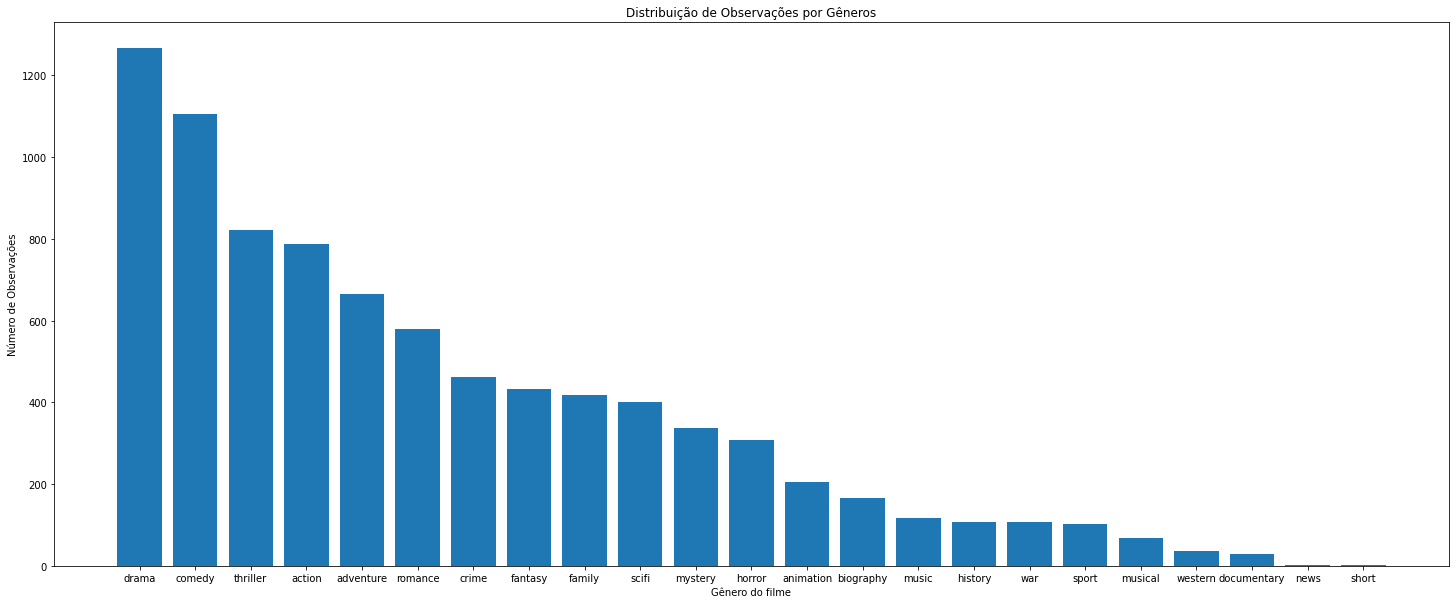

In [53]:
fig = plt.figure(figsize = (25, 10)) 
plt.bar(temp_genres_df['genres'], temp_genres_df['contagem'])
plt.xlabel("Gênero do filme") 
plt.ylabel("Número de Observações") 
plt.title("Distribuição de Observações por Gêneros") 
plt.show()

In [54]:
list_biggest_genres = temp_genres.groupby('genres').size().sort_values(ascending=False).to_frame('contagem').reset_index()['genres'].head(12).to_list()
list_biggest_genres

['drama',
 'comedy',
 'thriller',
 'action',
 'adventure',
 'romance',
 'crime',
 'fantasy',
 'family',
 'scifi',
 'mystery',
 'horror']

In [55]:
genres_one_hot_encoding = pd.get_dummies(genres_one_hot_encoding).sum(level=0)
genres_one_hot_encoding

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,musical,mystery,news,romance,scifi,short,sport,thriller,war,western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
15274,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15365,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15551,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
genres_one_hot_encoding_top19 = genres_one_hot_encoding[list_biggest_genres]
genres_one_hot_encoding_top19

,drama,comedy,thriller,action,adventure,romance,crime,fantasy,family,scifi,mystery,horror
0,0,0,0,1,1,0,0,0,0,1,0,0
1,1,0,0,1,1,0,0,0,0,1,0,0
2,0,0,0,1,1,0,0,1,0,1,0,0
6,0,0,0,1,1,0,0,0,0,1,0,0
7,0,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1,0,0,0,0,1,0,0,0,0,1,0
15274,1,0,0,0,0,0,1,0,0,0,0,0
15365,0,1,0,0,0,0,1,0,0,0,0,0
15551,0,1,0,0,0,0,1,0,0,0,0,0


In [57]:
other_genres = genres_one_hot_encoding[set(genres_one_hot_encoding.columns) - set(list_biggest_genres)].max(axis='columns').to_frame('other')
other_genres

,other
0,0
1,0
2,0
6,0
7,0
...,...
15174,1
15274,0
15365,1
15551,0


In [58]:
other_genres.sum()

other    715
dtype: int64

In [59]:
temp_genre = pd.concat([genres_one_hot_encoding_top19, other_genres], axis='columns')
temp_genre

,drama,comedy,thriller,action,adventure,romance,crime,fantasy,family,scifi,mystery,horror,other
0,0,0,0,1,1,0,0,0,0,1,0,0,0
1,1,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,1,0,1,0,0,0
6,0,0,0,1,1,0,0,0,0,1,0,0,0
7,0,0,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1,0,0,0,0,1,0,0,0,0,1,0,1
15274,1,0,0,0,0,0,1,0,0,0,0,0,0
15365,0,1,0,0,0,0,1,0,0,0,0,0,1
15551,0,1,0,0,0,0,1,0,0,0,0,0,0


In [60]:
temp_genre = temp_genre.add_prefix('genre_').astype(bool)
temp_genre

,genre_drama,genre_comedy,genre_thriller,genre_action,genre_adventure,genre_romance,genre_crime,genre_fantasy,genre_family,genre_scifi,genre_mystery,genre_horror,genre_other
0,False,False,False,True,True,False,False,False,False,True,False,False,False
1,True,False,False,True,True,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,True,False,True,False,False,False
6,False,False,False,True,True,False,False,False,False,True,False,False,False
7,False,False,False,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,True,False,False,False,False,True,False,False,False,False,True,False,True
15274,True,False,False,False,False,False,True,False,False,False,False,False,False
15365,False,True,False,False,False,False,True,False,False,False,False,False,True
15551,False,True,False,False,False,False,True,False,False,False,False,False,False


In [61]:
temp_genre.reset_index(drop=True)

,genre_drama,genre_comedy,genre_thriller,genre_action,genre_adventure,genre_romance,genre_crime,genre_fantasy,genre_family,genre_scifi,genre_mystery,genre_horror,genre_other
0,False,False,False,True,True,False,False,False,False,True,False,False,False
1,True,False,False,True,True,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,True,False,True,False,False,False
3,False,False,False,True,True,False,False,False,False,True,False,False,False
4,False,False,False,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,True,False,False,False,False,True,False,False,False,False,True,False,True
2676,True,False,False,False,False,False,True,False,False,False,False,False,False
2677,False,True,False,False,False,False,True,False,False,False,False,False,True
2678,False,True,False,False,False,False,True,False,False,False,False,False,False


In [62]:
filmes_final = pd.concat([filmes_final, temp_genre], axis='columns').copy()
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,genre_action,genre_adventure,genre_romance,genre_crime,genre_fantasy,genre_family,genre_scifi,genre_mystery,genre_horror,genre_other
0,star wars episode vii the force awakens,tt2488496,138,16,12,2015,2068223624,936662225,1131561399,247966675,...,True,True,False,False,False,False,True,False,False,False
1,avengers endgame,tt4154796,181,24,4,2019,2797800564,858373000,1939427564,357115007,...,True,True,False,False,False,False,True,False,False,False
2,avatar,tt0499549,162,16,12,2009,2790439000,760507625,2029931375,77025481,...,True,True,False,False,True,False,True,False,False,False
6,jurassic world,tt0369610,124,10,6,2015,1670400637,652270625,1018130012,208806270,...,True,True,False,False,False,False,True,False,False,False
7,the avengers,tt0848228,143,25,4,2012,1518812988,623357910,895455078,207438708,...,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109,6,5,2005,10514,10514,0,5199,...,False,False,True,False,False,False,False,True,False,True
15274,down terrace,tt1489167,89,15,10,2010,9812,9812,0,3088,...,False,False,False,True,False,False,False,False,False,False
15365,the janky promoters,tt1210071,85,16,10,2009,9069,9069,0,5702,...,False,False,False,True,False,False,False,False,False,True
15551,scorched,tt0286947,95,30,5,2003,369194,8000,361194,8000,...,False,False,False,True,False,False,False,False,False,False


In [63]:
filmes_final['genres']

0                 [action, adventure, scifi]
1          [action, adventure, drama, scifi]
2        [action, adventure, fantasy, scifi]
6                 [action, adventure, scifi]
7                 [action, adventure, scifi]
                        ...                 
15174       [drama, mystery, romance, sport]
15274                         [crime, drama]
15365                 [comedy, crime, music]
15551                        [comedy, crime]
16551               [comedy, drama, romance]
Name: genres, Length: 2680, dtype: object

In [64]:
filmes_final = filmes_final.drop(labels='genres', axis='columns').copy()
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,genre_action,genre_adventure,genre_romance,genre_crime,genre_fantasy,genre_family,genre_scifi,genre_mystery,genre_horror,genre_other
0,star wars episode vii the force awakens,tt2488496,138,16,12,2015,2068223624,936662225,1131561399,247966675,...,True,True,False,False,False,False,True,False,False,False
1,avengers endgame,tt4154796,181,24,4,2019,2797800564,858373000,1939427564,357115007,...,True,True,False,False,False,False,True,False,False,False
2,avatar,tt0499549,162,16,12,2009,2790439000,760507625,2029931375,77025481,...,True,True,False,False,True,False,True,False,False,False
6,jurassic world,tt0369610,124,10,6,2015,1670400637,652270625,1018130012,208806270,...,True,True,False,False,False,False,True,False,False,False
7,the avengers,tt0848228,143,25,4,2012,1518812988,623357910,895455078,207438708,...,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109,6,5,2005,10514,10514,0,5199,...,False,False,True,False,False,False,False,True,False,True
15274,down terrace,tt1489167,89,15,10,2010,9812,9812,0,3088,...,False,False,False,True,False,False,False,False,False,False
15365,the janky promoters,tt1210071,85,16,10,2009,9069,9069,0,5702,...,False,False,False,True,False,False,False,False,False,True
15551,scorched,tt0286947,95,30,5,2003,369194,8000,361194,8000,...,False,False,False,True,False,False,False,False,False,False


<br><br>
### Coluna _languages_
Os idiomas vem em formato igual aos dos gêneros, então será necessário o mesmo tratamento aqui.

In [65]:
filmes_final['language']

0                              english
1        english,japanese,xhosa,german
2                      english,spanish
6                              english
7                english,russian,hindi
                     ...              
15174                  english,spanish
15274                          english
15365                          english
15551                          english
16551                          english
Name: language, Length: 2680, dtype: object

In [66]:
filmes_final.loc[:, 'language'] = filmes_final.loc[:, 'language'].str.split(",").copy()
df_temp_lang = filmes_final['language']

In [67]:
df_temp_lang.to_frame().reset_index(drop=True)

,language
0,[english]
1,"[english, japanese, xhosa, german]"
2,"[english, spanish]"
3,[english]
4,"[english, russian, hindi]"
...,...
2675,"[english, spanish]"
2676,[english]
2677,[english]
2678,[english]


In [68]:
language_list = filmes_final['language'].apply(pd.Series).stack().unique()
language_list

array(['english', 'japanese', 'xhosa', 'german', 'spanish', 'russian',
       'hindi', 'zulu', 'french', 'mandarin', 'korean', 'arabic',
       'turkish', 'greek', 'dutch', 'chinese', 'ancient', 'to', '1453',
       'north', 'american', 'indian', 'romanian', 'norwegian', 'italian',
       'czech', 'quenya', 'old', 'sindarin', 'aramaic', 'latin', 'hebrew',
       'ukrainian', 'thai', 'cantonese', 'hungarian', 'kurdish',
       'persian', 'urdu', 'shanghainese', 'portuguese', 'brazilian',
       'sign', 'language', 'greenlandic', 'yiddish', 'khmer',
       'vietnamese', 'klingon', 'british', 'malay', 'swedish', 'pawnee',
       'languages', 'hokkien', 'samoan', 'swiss', 'serbian', 'tibetan',
       'icelandic', 'bulgarian', 'polish', 'egyptian', 'scottish',
       'gaelic', 'hmong', 'hawaiian', 'albanian', 'punjabi', 'armenian',
       'lingala', 'afrikaans', 'finnish', 'pushto', 'tamil', 'none',
       'nyanja', 'southern', 'sotho', 'filipino', 'somali', 'papiamento',
       'sanskrit',

In [69]:
language_one_hot_encoding = filmes_final['language'].apply(pd.Series).stack()
language_one_hot_encoding

0      0     english
1      0     english
       1    japanese
       2       xhosa
       3      german
              ...   
15174  1     spanish
15274  0     english
15365  0     english
15551  0     english
16551  0     english
Length: 4726, dtype: object

In [70]:
temp_language = language_one_hot_encoding.to_frame('language')
temp_language

language
0     0   english
1     0   english
      1  japanese
      2     xhosa
      3    german
...           ...
15174 1   spanish
15274 0   english
15365 0   english
15551 0   english
16551 0   english

[4726 rows x 1 columns]

In [71]:
# lista de idiomas mais falados
temp_language.groupby('language').size().sort_values(ascending=False)

language
english         2662
spanish          348
french           285
german           173
russian          142
                ... 
shanghainese       1
hmong              1
croatian           1
hokkien            1
esperanto          1
Length: 123, dtype: int64

In [72]:
df_temp_language = temp_language.groupby('language').size().sort_values(ascending=False).to_frame('count')
df_temp_language

,count
language,
english,2662
spanish,348
french,285
german,173
russian,142
...,...
shanghainese,1
hmong,1
croatian,1


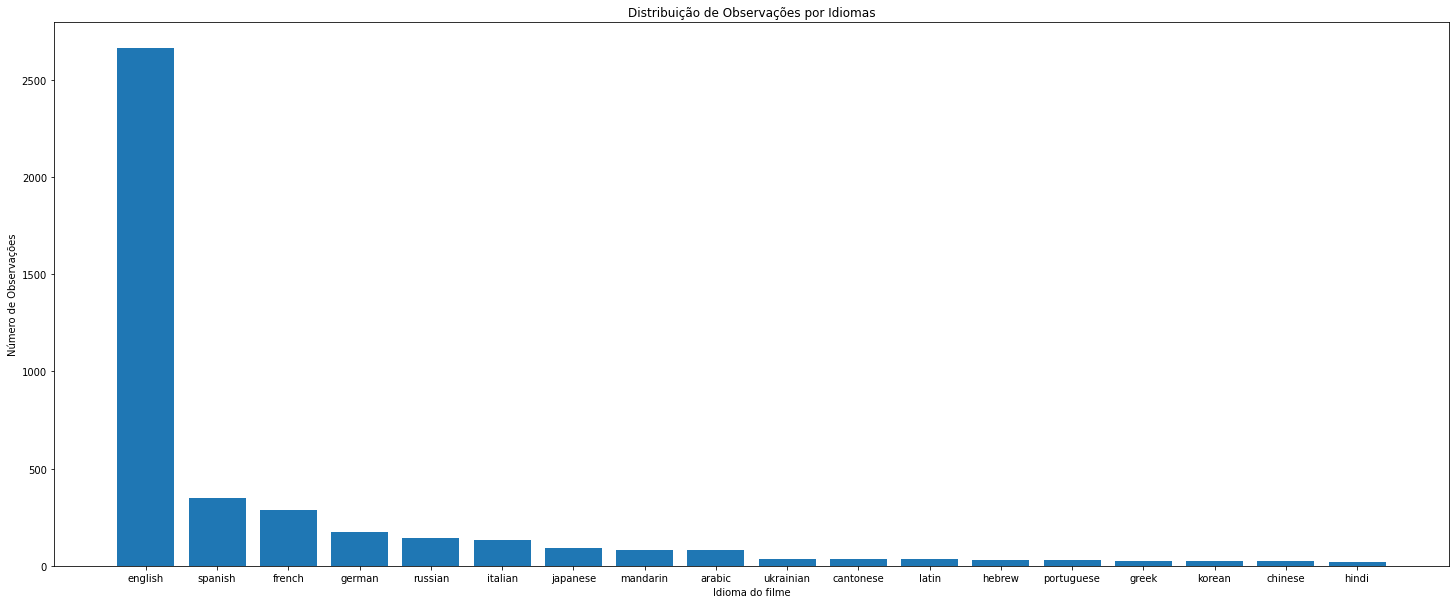

In [73]:
fig = plt.figure(figsize = (25, 10)) 
plt.bar(df_temp_language.reset_index().head(18)['language'], df_temp_language.reset_index().head(18)['count'])
plt.xlabel("Idioma do filme") 
plt.ylabel("Número de Observações") 
plt.title("Distribuição de Observações por Idiomas") 
plt.show()

In [74]:
#df_temp_language.to_csv('teste2.csv')

In [75]:
list_biggest_languages = temp_language.groupby('language').size().sort_values(ascending=False).to_frame('contagem').reset_index()['language'].head(3).to_list()
list_biggest_languages

['english', 'spanish', 'french']

In [76]:
language_one_hot_encoding = pd.get_dummies(language_one_hot_encoding).sum(level=0)
language_one_hot_encoding

,1453,aboriginal,acholi,afrikaans,albanian,american,amharic,ancient,apache,arabic,...,to,turkish,ukrainian,urdu,uzbek,vietnamese,welsh,xhosa,yiddish,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# montando o one hot encoding dos 10 idiomas mais falados nos filmes
language_one_hot_encoding_top10 = language_one_hot_encoding[list_biggest_languages]
language_one_hot_encoding_top10

,english,spanish,french
0,1,0,0
1,1,0,0
2,1,1,0
6,1,0,0
7,1,0,0
...,...,...,...
15174,1,1,0
15274,1,0,0
15365,1,0,0
15551,1,0,0


In [78]:
# montando a lista de "outros idiomas", que será 1 toda vez que pelo menos um outro idioma além do top10 idiomas existir no filme
other_languages = language_one_hot_encoding[set(language_one_hot_encoding.columns) - set(list_biggest_languages)].max(axis='columns')
other_languages

0        0
1        1
2        0
6        0
7        1
        ..
15174    0
15274    0
15365    0
15551    0
16551    0
Length: 2680, dtype: uint8

In [79]:
# colocando esse resultado em um dataframe para ser possível concatenar com o top10
other_languages = other_languages.to_frame('other')
other_languages

,other
0,0
1,1
2,0
6,0
7,1
...,...
15174,0
15274,0
15365,0
15551,0


In [80]:
other_languages.sum()

other    818
dtype: int64

In [81]:
temp_language = pd.concat([language_one_hot_encoding_top10, other_languages], axis='columns')
temp_language

,english,spanish,french,other
0,1,0,0,0
1,1,0,0,1
2,1,1,0,0
6,1,0,0,0
7,1,0,0,1
...,...,...,...,...
15174,1,1,0,0
15274,1,0,0,0
15365,1,0,0,0
15551,1,0,0,0


In [82]:
temp_language = temp_language.add_prefix("language_").astype(bool)
temp_language

,language_english,language_spanish,language_french,language_other
0,True,False,False,False
1,True,False,False,True
2,True,True,False,False
6,True,False,False,False
7,True,False,False,True
...,...,...,...,...
15174,True,True,False,False
15274,True,False,False,False
15365,True,False,False,False
15551,True,False,False,False


In [83]:
temp_language.reset_index(drop=True)

,language_english,language_spanish,language_french,language_other
0,True,False,False,False
1,True,False,False,True
2,True,True,False,False
3,True,False,False,False
4,True,False,False,True
...,...,...,...,...
2675,True,True,False,False
2676,True,False,False,False
2677,True,False,False,False
2678,True,False,False,False


In [84]:
filmes_final = pd.concat([filmes_final, temp_language], axis='columns')
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,genre_fantasy,genre_family,genre_scifi,genre_mystery,genre_horror,genre_other,language_english,language_spanish,language_french,language_other
0,star wars episode vii the force awakens,tt2488496,138,16,12,2015,2068223624,936662225,1131561399,247966675,...,False,False,True,False,False,False,True,False,False,False
1,avengers endgame,tt4154796,181,24,4,2019,2797800564,858373000,1939427564,357115007,...,False,False,True,False,False,False,True,False,False,True
2,avatar,tt0499549,162,16,12,2009,2790439000,760507625,2029931375,77025481,...,True,False,True,False,False,False,True,True,False,False
6,jurassic world,tt0369610,124,10,6,2015,1670400637,652270625,1018130012,208806270,...,False,False,True,False,False,False,True,False,False,False
7,the avengers,tt0848228,143,25,4,2012,1518812988,623357910,895455078,207438708,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109,6,5,2005,10514,10514,0,5199,...,False,False,False,True,False,True,True,True,False,False
15274,down terrace,tt1489167,89,15,10,2010,9812,9812,0,3088,...,False,False,False,False,False,False,True,False,False,False
15365,the janky promoters,tt1210071,85,16,10,2009,9069,9069,0,5702,...,False,False,False,False,False,True,True,False,False,False
15551,scorched,tt0286947,95,30,5,2003,369194,8000,361194,8000,...,False,False,False,False,False,False,True,False,False,False


In [85]:
# apagar a coluna de listas de idiomas
filmes_final = filmes_final.drop(labels='language', axis='columns')

In [86]:
filmes_final.columns

Index(['title_name', 'title_id', 'runtime', 'release_day', 'release_month',
       'release_year', 'worldwide_gross', 'domestic_gross', 'foreign_gross',
       'opening_gross', 'budget', 'age_rating', 'genre_drama', 'genre_comedy',
       'genre_thriller', 'genre_action', 'genre_adventure', 'genre_romance',
       'genre_crime', 'genre_fantasy', 'genre_family', 'genre_scifi',
       'genre_mystery', 'genre_horror', 'genre_other', 'language_english',
       'language_spanish', 'language_french', 'language_other'],
      dtype='object')

In [87]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,genre_fantasy,genre_family,genre_scifi,genre_mystery,genre_horror,genre_other,language_english,language_spanish,language_french,language_other
0,star wars episode vii the force awakens,tt2488496,138,16,12,2015,2068223624,936662225,1131561399,247966675,...,False,False,True,False,False,False,True,False,False,False
1,avengers endgame,tt4154796,181,24,4,2019,2797800564,858373000,1939427564,357115007,...,False,False,True,False,False,False,True,False,False,True
2,avatar,tt0499549,162,16,12,2009,2790439000,760507625,2029931375,77025481,...,True,False,True,False,False,False,True,True,False,False
6,jurassic world,tt0369610,124,10,6,2015,1670400637,652270625,1018130012,208806270,...,False,False,True,False,False,False,True,False,False,False
7,the avengers,tt0848228,143,25,4,2012,1518812988,623357910,895455078,207438708,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109,6,5,2005,10514,10514,0,5199,...,False,False,False,True,False,True,True,True,False,False
15274,down terrace,tt1489167,89,15,10,2010,9812,9812,0,3088,...,False,False,False,False,False,False,True,False,False,False
15365,the janky promoters,tt1210071,85,16,10,2009,9069,9069,0,5702,...,False,False,False,False,False,True,True,False,False,False
15551,scorched,tt0286947,95,30,5,2003,369194,8000,361194,8000,...,False,False,False,False,False,False,True,False,False,False


<br><br>
## Dia da semana 

In [88]:
import datetime

In [89]:
filmes_final['release_day'].astype(str).str.pad(width=2, side='left', fillchar='0')

0        16
1        24
2        16
6        10
7        25
         ..
15174    06
15274    15
15365    16
15551    30
16551    09
Name: release_day, Length: 2680, dtype: object

In [90]:
filmes_final['release_month'].astype(str).str.pad(width=2, side='left', fillchar='0')

0        12
1        04
2        12
6        06
7        04
         ..
15174    05
15274    10
15365    10
15551    05
16551    09
Name: release_month, Length: 2680, dtype: object

In [91]:
filmes_final['release_year'].astype(str).str.pad(width=4, side='left', fillchar='0')

0        2015
1        2019
2        2009
6        2015
7        2012
         ... 
15174    2005
15274    2010
15365    2009
15551    2003
16551    2005
Name: release_year, Length: 2680, dtype: object

In [92]:
pd.to_datetime(filmes_final['release_day'].astype(str).str.pad(width=2, side='left', fillchar='0') + filmes_final['release_month'].astype(str).str.pad(width=2, side='left', fillchar='0') + filmes_final['release_year'].astype(str).str.pad(width=4, side='left', fillchar='0'), format='%d%m%Y')

0       2015-12-16
1       2019-04-24
2       2009-12-16
6       2015-06-10
7       2012-04-25
           ...    
15174   2005-05-06
15274   2010-10-15
15365   2009-10-16
15551   2003-05-30
16551   2005-09-09
Length: 2680, dtype: datetime64[ns]

In [93]:
filmes_final['datetime'] = pd.to_datetime(filmes_final['release_day'].astype(str).str.pad(width=2, side='left', fillchar='0') + filmes_final['release_month'].astype(str).str.pad(width=2, side='left', fillchar='0') + filmes_final['release_year'].astype(str).str.pad(width=4, side='left', fillchar='0'), format='%d%m%Y')

In [94]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,genre_family,genre_scifi,genre_mystery,genre_horror,genre_other,language_english,language_spanish,language_french,language_other,datetime
0,star wars episode vii the force awakens,tt2488496,138,16,12,2015,2068223624,936662225,1131561399,247966675,...,False,True,False,False,False,True,False,False,False,2015-12-16
1,avengers endgame,tt4154796,181,24,4,2019,2797800564,858373000,1939427564,357115007,...,False,True,False,False,False,True,False,False,True,2019-04-24
2,avatar,tt0499549,162,16,12,2009,2790439000,760507625,2029931375,77025481,...,False,True,False,False,False,True,True,False,False,2009-12-16
6,jurassic world,tt0369610,124,10,6,2015,1670400637,652270625,1018130012,208806270,...,False,True,False,False,False,True,False,False,False,2015-06-10
7,the avengers,tt0848228,143,25,4,2012,1518812988,623357910,895455078,207438708,...,False,True,False,False,False,True,False,False,True,2012-04-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,fighting tommy riley,tt0366444,109,6,5,2005,10514,10514,0,5199,...,False,False,True,False,True,True,True,False,False,2005-05-06
15274,down terrace,tt1489167,89,15,10,2010,9812,9812,0,3088,...,False,False,False,False,False,True,False,False,False,2010-10-15
15365,the janky promoters,tt1210071,85,16,10,2009,9069,9069,0,5702,...,False,False,False,False,True,True,False,False,False,2009-10-16
15551,scorched,tt0286947,95,30,5,2003,369194,8000,361194,8000,...,False,False,False,False,False,True,False,False,False,2003-05-30


In [95]:
dados_grafico_release_day = filmes_final['release_day'].value_counts().to_frame('observacoes').reset_index()
dados_grafico_release_day

,index,observacoes
0,22,109
1,21,106
2,19,106
3,12,105
4,9,104
5,25,104
6,7,103
7,16,97
8,14,95
9,17,95


In [96]:
dados_grafico_release_day = dados_grafico_release_day.rename(columns={"index": "release_day", "observacoes": "observacoes"})
dados_grafico_release_day

,release_day,observacoes
0,22,109
1,21,106
2,19,106
3,12,105
4,9,104
5,25,104
6,7,103
7,16,97
8,14,95
9,17,95


In [97]:
dados_grafico_release_day = dados_grafico_release_day.sort_values(by='release_day')
dados_grafico_release_day

,release_day,observacoes
20,1,81
25,2,72
28,3,69
24,4,73
22,5,74
17,6,84
6,7,103
21,8,79
4,9,104
13,10,91


In [98]:
import matplotlib.pyplot as plt  

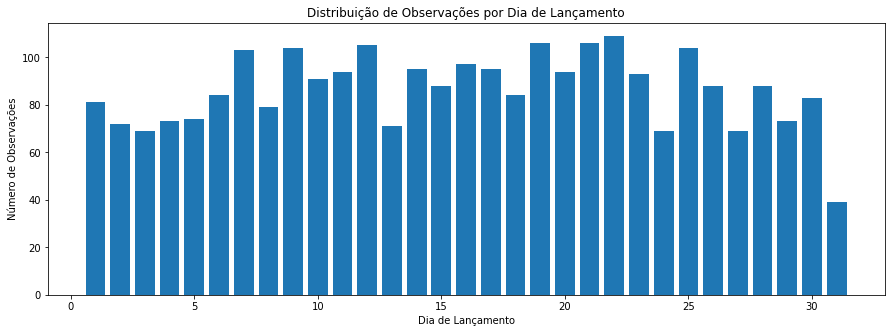

In [99]:
fig = plt.figure(figsize = (15, 5)) 
plt.bar( dados_grafico_release_day['release_day'], dados_grafico_release_day['observacoes'])
plt.xlabel("Dia de Lançamento") 
plt.ylabel("Número de Observações") 
plt.title("Distribuição de Observações por Dia de Lançamento") 
plt.show()

In [100]:
temp_weekday = filmes_final['datetime'].dt.dayofweek.astype(str).apply(pd.Series).stack().to_frame('weekday').groupby('weekday').size().to_frame('observacoes').reset_index()
temp_weekday['weekday'] = temp_weekday['weekday'].str.replace('0', 'segunda-feira').replace('1', 'terça-feira').replace('2', 'quarta-feira').replace('3', 'quinta-feira').replace('4', 'sexta-feira').replace('5', 'sábado').replace('6', 'domingo')
temp_weekday

,weekday,observacoes
0,segunda-feira,15
1,terça-feira,45
2,quarta-feira,706
3,quinta-feira,609
4,sexta-feira,1290
5,sábado,10
6,domingo,5


In [101]:
filmes_final['datetime'].dt.dayofweek.astype(str).str.replace('0', 'segunda-feira').replace('1', 'terça-feira').replace('2', 'quarta-feira').replace('3', 'quinta-feira').replace('4', 'sexta-feira').replace('5', 'sábado').replace('6', 'domingo').to_frame('weekday').reset_index(drop=True)

,weekday
0,quarta-feira
1,quarta-feira
2,quarta-feira
3,quarta-feira
4,quarta-feira
...,...
2675,sexta-feira
2676,sexta-feira
2677,sexta-feira
2678,sexta-feira


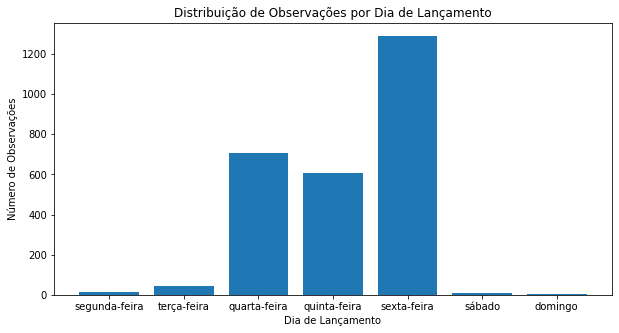

In [102]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(temp_weekday['weekday'], temp_weekday['observacoes'])
plt.xlabel("Dia de Lançamento") 
plt.ylabel("Número de Observações") 
plt.title("Distribuição de Observações por Dia de Lançamento") 
#fig.set_xticklabels(temp_weekday['observacoes'])
plt.show()

In [103]:
filmes_final['weekday'] = filmes_final['datetime'].dt.dayofweek.astype(str).str.replace('0', 'weekday_monday').replace('1', 'weekday_tuesday').replace('2', 'weekday_wednesday').replace('3', 'weekday_thursday').replace('4', 'weekday_friday').replace('5', 'weekday_saturday').replace('6', 'weekday_sunday')

In [104]:
filmes_final['weekday'].apply(pd.Series).stack().unique()

array(['weekday_wednesday', 'weekday_friday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday'], dtype=object)

In [105]:
list_biggest_weekdays = filmes_final['weekday'].apply(pd.Series).stack().to_frame('weekday').groupby('weekday').size().sort_values(ascending=False).to_frame('contagem').reset_index()['weekday'].head(3).to_list()
list_biggest_weekdays

['weekday_friday', 'weekday_wednesday', 'weekday_thursday']

In [106]:
weekday_one_hot_encoding_top3 = pd.get_dummies(filmes_final['weekday'].apply(pd.Series).stack()).sum(level=0)[list_biggest_weekdays].astype(bool)
weekday_one_hot_encoding_top3

,weekday_friday,weekday_wednesday,weekday_thursday
0,False,True,False
1,False,True,False
2,False,True,False
6,False,True,False
7,False,True,False
...,...,...,...
15174,True,False,False
15274,True,False,False
15365,True,False,False
15551,True,False,False


In [107]:
other_weekdays = pd.get_dummies(filmes_final['weekday'].apply(pd.Series).stack()).sum(level=0)[set(pd.get_dummies(filmes_final['weekday'].apply(pd.Series).stack()).sum(level=0))-set(list_biggest_weekdays)].max(axis='columns')
other_weekdays

0        0
1        0
2        0
6        0
7        0
        ..
15174    0
15274    0
15365    0
15551    0
16551    0
Length: 2680, dtype: uint8

In [108]:
other_weekdays = other_weekdays.to_frame('weekday_other').astype(bool)

In [109]:
filmes_final['release_day'].to_frame().reset_index(drop=True)

,release_day
0,16
1,24
2,16
3,10
4,25
...,...
2675,6
2676,15
2677,16
2678,30


In [110]:
pd.concat([weekday_one_hot_encoding_top3, other_weekdays], axis='columns').copy().reset_index()[['weekday_wednesday', 'weekday_thursday', 'weekday_friday', 'weekday_other']]

,weekday_wednesday,weekday_thursday,weekday_friday,weekday_other
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
2675,False,False,True,False
2676,False,False,True,False
2677,False,False,True,False
2678,False,False,True,False


In [111]:
filmes_final = pd.concat([filmes_final, weekday_one_hot_encoding_top3, other_weekdays], axis='columns').copy()

In [112]:
filmes_final = filmes_final.drop(['datetime', 'weekday'], axis='columns')

In [113]:
filmes_final.columns

Index(['title_name', 'title_id', 'runtime', 'release_day', 'release_month',
       'release_year', 'worldwide_gross', 'domestic_gross', 'foreign_gross',
       'opening_gross', 'budget', 'age_rating', 'genre_drama', 'genre_comedy',
       'genre_thriller', 'genre_action', 'genre_adventure', 'genre_romance',
       'genre_crime', 'genre_fantasy', 'genre_family', 'genre_scifi',
       'genre_mystery', 'genre_horror', 'genre_other', 'language_english',
       'language_spanish', 'language_french', 'language_other',
       'weekday_friday', 'weekday_wednesday', 'weekday_thursday',
       'weekday_other'],
      dtype='object')

In [114]:
filmes_final = filmes_final.sort_values('worldwide_gross', ascending=False).reset_index().drop(['index'], axis='columns').copy()

<br><br>

### Criação da Variável 'roi' - return on investiment - HIPÓTESE 3

Calculado por lucro dividido por orçamento (isso é, __(bilheteria - orçamento)/orçamento__)

In [115]:
filmes_final['roi'] = ((filmes_final['worldwide_gross']-filmes_final['budget'])/filmes_final['budget']).copy()

In [116]:
df_temp_roi = filmes_final.reset_index()[['index', 'roi', 'title_name', 'release_year', 'budget', 'worldwide_gross']].sort_values(by='roi', ascending=False)
df_temp_roi

,index,roi,title_name,release_year,budget,worldwide_gross
628,628,12889.386667,paranormal activity,2009,15000,193355800
1789,1789,428.644100,the gallows,2015,100000,42964410
2135,2135,316.627031,super size me,2004,65000,20645757
367,367,311.242626,resident evil the final chapter,2016,1000000,312242626
2619,2619,237.881818,my date with drew,2005,1100,262770
...,...,...,...,...,...,...
2666,2666,-0.994922,the boondock saints,2000,6000000,30471
2675,2675,-0.995740,christmas at maxwells,2006,3000000,12781
2674,2674,-0.996666,fascination,2005,5000000,16670
2678,2678,-0.999093,the janky promoters,2009,10000000,9069


In [117]:
df_temp_roi[df_temp_roi['roi']>90]

,index,roi,title_name,release_year,budget,worldwide_gross
628,628,12889.386667,paranormal activity,2009,15000,193355800
1789,1789,428.644100,the gallows,2015,100000,42964410
2135,2135,316.627031,super size me,2004,65000,20645757
367,367,311.242626,resident evil the final chapter,2016,1000000,312242626
2619,2619,237.881818,my date with drew,2005,1100,262770
769,769,159.466000,johnny english,2003,1000000,160466000
842,842,145.936910,the last witch hunter,2015,1000000,146936910
2130,2130,138.578147,once,2007,150000,20936722
895,895,132.718711,point break,2015,1000000,133718711
1737,1737,114.347217,napoleon dynamite,2004,400000,46138887


In [118]:
filmes_final['roi'].sort_values().reset_index()['roi']

0          -0.999926
1          -0.999093
2          -0.996666
3          -0.995740
4          -0.994922
            ...     
2675      237.881818
2676      311.242626
2677      316.627031
2678      428.644100
2679    12889.386667
Name: roi, Length: 2680, dtype: float64

<AxesSubplot:>

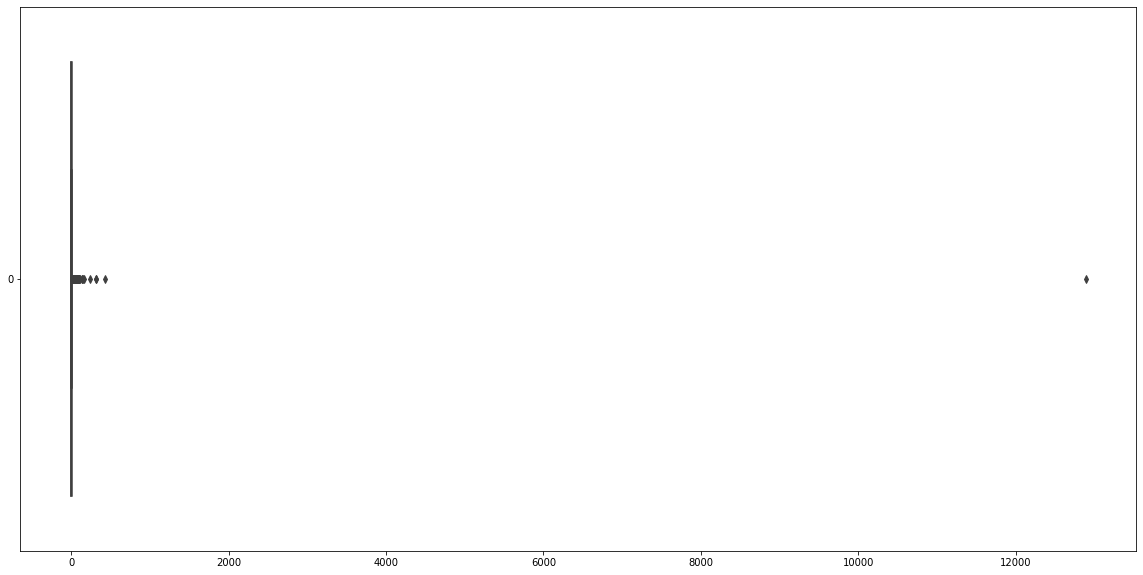

In [119]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data=filmes_final['roi'].sort_values().reset_index()['roi'],  orient="h")

<br><br>

### Criação da Variável 'tickets_sold' - HIPÓTESE 4

Referente ao número médio de ingressos vendidos de acordo com o preço médio do ingresso

In [120]:
# Definindo o dicionário de preços médios de ingresso (ticket)
ticket_average_price_dict = {2019 : 9.11,
2018 : 9.11,
2017 : 8.97,
2016 : 8.65,
2015 : 8.43,
2014 : 8.17,
2013 : 8.13,
2012 : 7.96,
2011 : 7.93,
2010 : 7.89,
2009 : 7.50,
2008 : 7.18,
2007 : 6.88,
2006 : 6.55,
2005 : 6.41,
2004 : 6.21,
2003 : 6.03,
2002 : 5.81,
2001 : 5.66,
2000 : 5.39,
1999 : 5.08,
1998 : 4.69,
1997 : 4.59,
1996 : 4.42,
1995 : 4.35}

In [121]:
filmes_final['ticket_average_price_by_year'] = filmes_final['release_year'].apply(lambda x: ticket_average_price_dict[x]).copy()
filmes_final['domestic_gross_by_ticket_average_price'] = (filmes_final['domestic_gross']/filmes_final['ticket_average_price_by_year']).to_frame('domestic_gross_by_ticket_average_price').sort_values(by='domestic_gross_by_ticket_average_price', ascending=False).apply(lambda x: x.astype(int)).copy()

In [122]:
### Dividir a bilheteria arrecadada pelo preço do ingresso resulta no número de ingressos vendidos (em média)
filmes_final['tickets_sold'] = filmes_final['domestic_gross_by_ticket_average_price'].copy()

In [123]:
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,language_french,language_other,weekday_friday,weekday_wednesday,weekday_thursday,weekday_other,roi,ticket_average_price_by_year,domestic_gross_by_ticket_average_price,tickets_sold
0,avengers endgame,tt4154796,181,24,4,2019,2797800564,858373000,1939427564,357115007,...,False,True,False,True,False,False,6.858990,9.11,94223161,94223161
1,avatar,tt0499549,162,16,12,2009,2790439000,760507625,2029931375,77025481,...,False,False,False,True,False,False,10.774004,7.50,101401016,101401016
2,star wars episode vii the force awakens,tt2488496,138,16,12,2015,2068223624,936662225,1131561399,247966675,...,False,False,False,True,False,False,7.441729,8.43,111110584,111110584
3,avengers infinity war,tt4154756,149,25,4,2018,2048359754,678815482,1369544272,257698183,...,False,False,False,True,False,False,5.482151,9.11,74513225,74513225
4,jurassic world,tt0369610,124,10,6,2015,1670400637,652270625,1018130012,208806270,...,False,False,False,True,False,False,10.136004,8.43,77374925,77374925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,christmas at maxwells,tt0420550,94,1,12,2006,12781,12781,0,8375,...,False,False,True,False,False,False,-0.995740,6.55,1951,1951
2676,fighting tommy riley,tt0366444,109,6,5,2005,10514,10514,0,5199,...,False,False,True,False,False,False,-0.964953,6.41,1640,1640
2677,down terrace,tt1489167,89,15,10,2010,9812,9812,0,3088,...,False,False,True,False,False,False,-0.672933,7.89,1243,1243
2678,the janky promoters,tt1210071,85,16,10,2009,9069,9069,0,5702,...,False,False,True,False,False,False,-0.999093,7.50,1209,1209


<AxesSubplot:>

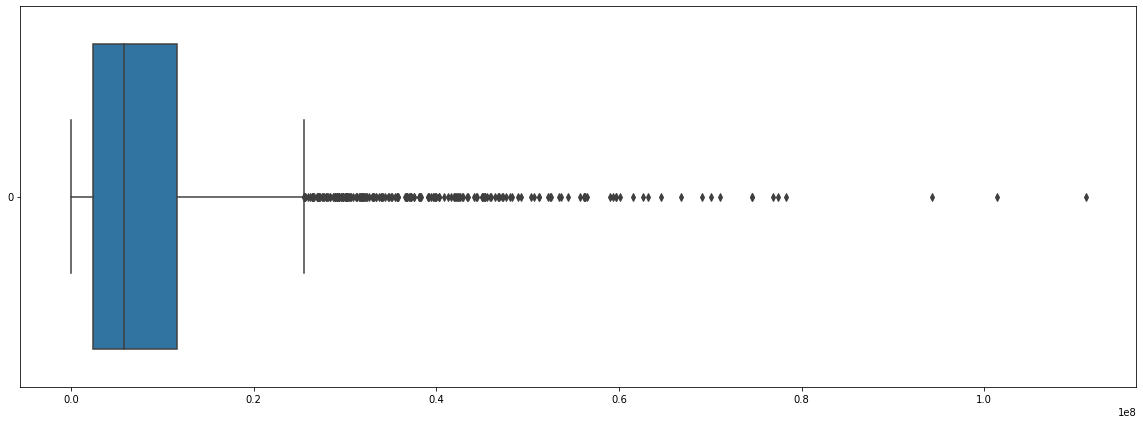

In [140]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.boxplot(data=filmes_final['tickets_sold'],  orient="h")

In [145]:
filmes_final[['title_name','tickets_sold']].sort_values(by='tickets_sold', ascending=False)

,title_name,tickets_sold
2,star wars episode vii the force awakens,111110584
1,avatar,101401016
0,avengers endgame,94223161
6,the avengers,78311295
4,jurassic world,77374925
...,...,...
2654,camp xray,1628
2612,scorched,1326
2677,down terrace,1243
2678,the janky promoters,1209


<br><br>

### Filtro para remover bilheterias outliers e colunas auxiliares 

In [124]:
# Remoção de outliers
filmes_final = filmes_final[(filmes_final['roi']<=100)].copy()
filmes_final

,title_name,title_id,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,...,language_french,language_other,weekday_friday,weekday_wednesday,weekday_thursday,weekday_other,roi,ticket_average_price_by_year,domestic_gross_by_ticket_average_price,tickets_sold
0,avengers endgame,tt4154796,181,24,4,2019,2797800564,858373000,1939427564,357115007,...,False,True,False,True,False,False,6.858990,9.11,94223161,94223161
1,avatar,tt0499549,162,16,12,2009,2790439000,760507625,2029931375,77025481,...,False,False,False,True,False,False,10.774004,7.50,101401016,101401016
2,star wars episode vii the force awakens,tt2488496,138,16,12,2015,2068223624,936662225,1131561399,247966675,...,False,False,False,True,False,False,7.441729,8.43,111110584,111110584
3,avengers infinity war,tt4154756,149,25,4,2018,2048359754,678815482,1369544272,257698183,...,False,False,False,True,False,False,5.482151,9.11,74513225,74513225
4,jurassic world,tt0369610,124,10,6,2015,1670400637,652270625,1018130012,208806270,...,False,False,False,True,False,False,10.136004,8.43,77374925,77374925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,christmas at maxwells,tt0420550,94,1,12,2006,12781,12781,0,8375,...,False,False,True,False,False,False,-0.995740,6.55,1951,1951
2676,fighting tommy riley,tt0366444,109,6,5,2005,10514,10514,0,5199,...,False,False,True,False,False,False,-0.964953,6.41,1640,1640
2677,down terrace,tt1489167,89,15,10,2010,9812,9812,0,3088,...,False,False,True,False,False,False,-0.672933,7.89,1243,1243
2678,the janky promoters,tt1210071,85,16,10,2009,9069,9069,0,5702,...,False,False,True,False,False,False,-0.999093,7.50,1209,1209


In [125]:
# Remoção das colunas auxiliares que foram criadas
filmes_final = filmes_final.drop(['domestic_gross_by_ticket_average_price', 'ticket_average_price_by_year'], axis='columns').copy()

<br><br>

## Infos finais e Export

In [126]:
filmes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2679
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_name         2668 non-null   object 
 1   title_id           2668 non-null   object 
 2   runtime            2668 non-null   int32  
 3   release_day        2668 non-null   int64  
 4   release_month      2668 non-null   int64  
 5   release_year       2668 non-null   int64  
 6   worldwide_gross    2668 non-null   int64  
 7   domestic_gross     2668 non-null   int64  
 8   foreign_gross      2668 non-null   int64  
 9   opening_gross      2668 non-null   int64  
 10  budget             2668 non-null   int64  
 11  age_rating         2668 non-null   int32  
 12  genre_drama        2668 non-null   bool   
 13  genre_comedy       2668 non-null   bool   
 14  genre_thriller     2668 non-null   bool   
 15  genre_action       2668 non-null   bool   
 16  genre_adventure    2668 

In [127]:
filmes_final.columns

Index(['title_name', 'title_id', 'runtime', 'release_day', 'release_month',
       'release_year', 'worldwide_gross', 'domestic_gross', 'foreign_gross',
       'opening_gross', 'budget', 'age_rating', 'genre_drama', 'genre_comedy',
       'genre_thriller', 'genre_action', 'genre_adventure', 'genre_romance',
       'genre_crime', 'genre_fantasy', 'genre_family', 'genre_scifi',
       'genre_mystery', 'genre_horror', 'genre_other', 'language_english',
       'language_spanish', 'language_french', 'language_other',
       'weekday_friday', 'weekday_wednesday', 'weekday_thursday',
       'weekday_other', 'roi', 'tickets_sold'],
      dtype='object')

In [128]:
filmes_final[['title_name', 'title_id', 'runtime', 'release_month', 
              'weekday_friday', 'weekday_wednesday', 'weekday_thursday', 'weekday_other',
              'budget', 'age_rating', 'genre_drama', 'genre_comedy',
       'genre_thriller', 'genre_action', 'genre_adventure', 'genre_romance',
       'genre_crime', 'genre_fantasy', 'genre_family', 'genre_scifi',
       'genre_mystery', 'genre_horror', 'genre_other', 'language_english',
       'language_spanish', 'language_french', 'language_other',
       'worldwide_gross', 'roi', 'domestic_gross', 'tickets_sold']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 0 to 2679
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_name         2668 non-null   object 
 1   title_id           2668 non-null   object 
 2   runtime            2668 non-null   int32  
 3   release_month      2668 non-null   int64  
 4   weekday_friday     2668 non-null   bool   
 5   weekday_wednesday  2668 non-null   bool   
 6   weekday_thursday   2668 non-null   bool   
 7   weekday_other      2668 non-null   bool   
 8   budget             2668 non-null   int64  
 9   age_rating         2668 non-null   int32  
 10  genre_drama        2668 non-null   bool   
 11  genre_comedy       2668 non-null   bool   
 12  genre_thriller     2668 non-null   bool   
 13  genre_action       2668 non-null   bool   
 14  genre_adventure    2668 non-null   bool   
 15  genre_romance      2668 non-null   bool   
 16  genre_crime        2668 

In [129]:
filmes_resumida = filmes_final

In [130]:
filmes_final.describe()

,runtime,release_day,release_month,release_year,worldwide_gross,domestic_gross,foreign_gross,opening_gross,budget,age_rating,roi,tickets_sold
count,2668.000000,2668.000000,2668.000000,2668.000000,2.668000e+03,2.668000e+03,2.668000e+03,2.668000e+03,2.668000e+03,2668.000000,2668.000000,2.668000e+03
mean,108.613943,15.935907,6.863193,2008.841454,1.584652e+08,6.857606e+07,8.988909e+07,2.016537e+07,4.962751e+07,3.176162,4.696329,9.359165e+06
std,17.899004,8.480951,3.424206,5.594802,2.349454e+08,8.611729e+07,1.563331e+08,2.802932e+07,5.164099e+07,0.783502,11.710220,1.126264e+07
min,41.000000,1.000000,1.000000,2000.000000,2.216000e+03,2.216000e+03,0.000000e+00,1.316000e+03,7.000000e+03,1.000000,-0.999926,3.450000e+02
25%,95.750000,9.000000,4.000000,2004.000000,2.880931e+07,1.699856e+07,6.872264e+06,4.522343e+06,1.400000e+07,3.000000,0.179003,2.405429e+06
50%,106.000000,16.000000,7.000000,2009.000000,7.765291e+07,4.251208e+07,3.385308e+07,1.245655e+07,3.100000e+07,3.000000,1.456444,5.793802e+06
75%,119.000000,23.000000,10.000000,2013.000000,1.799398e+08,8.356093e+07,9.708808e+07,2.427312e+07,6.800000e+07,4.000000,3.524499,1.163338e+07
max,219.000000,31.000000,12.000000,2019.000000,2.797801e+09,9.366622e+08,2.029931e+09,3.571150e+08,3.560000e+08,4.000000,99.541806,1.111106e+08


In [131]:
#filmes_final.to_csv('output_data_prep_final2.csv', sep=';', index=False)
filmes_final.to_csv('db_filmes.csv', sep=';', index=False)

<br><br>

## Gráficos criados sob os dados gerados

<AxesSubplot:>

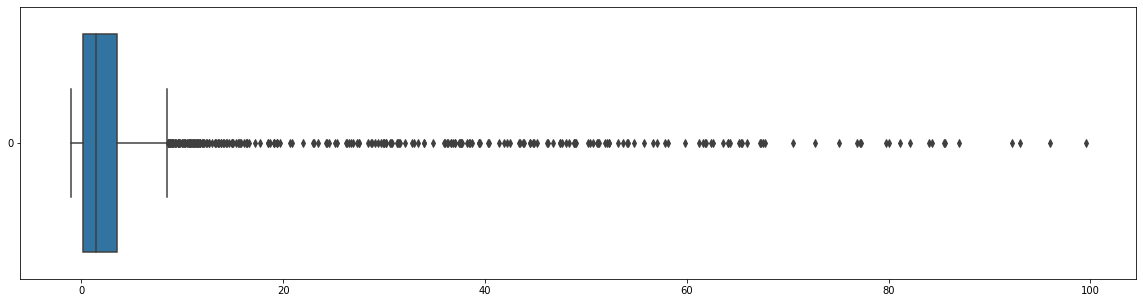

In [132]:
plt.figure(figsize=(20,5))
sns.boxplot(data=filmes_final['roi'].sort_values().reset_index()['roi'],  orient="h")

In [133]:
filmes_final['isProfitable'] = (filmes_final['budget'] - filmes_final['worldwide_gross']) > 0

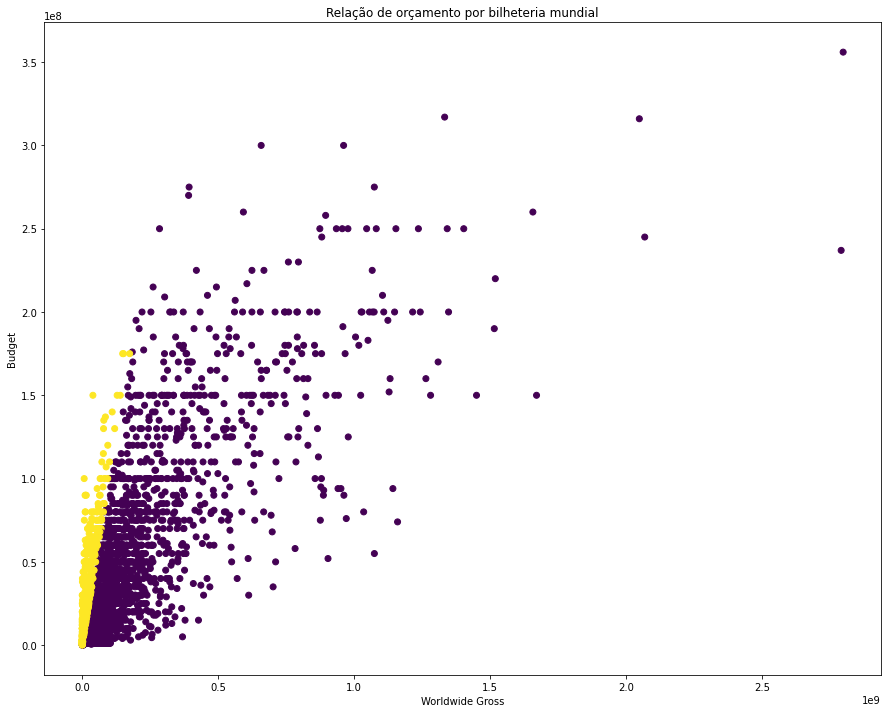

In [134]:
fig = plt.figure(figsize = (15, 12)) 
plt.scatter(filmes_final['worldwide_gross'], filmes_final['budget'], c=filmes_final['isProfitable'])
plt.xlabel("Worldwide Gross") 
plt.ylabel("Budget") 
plt.title("Relação de orçamento por bilheteria mundial") 
plt.show()

In [135]:
filmes_final['isProfitable'] = (filmes_final['budget'] - filmes_final['domestic_gross']) > 0

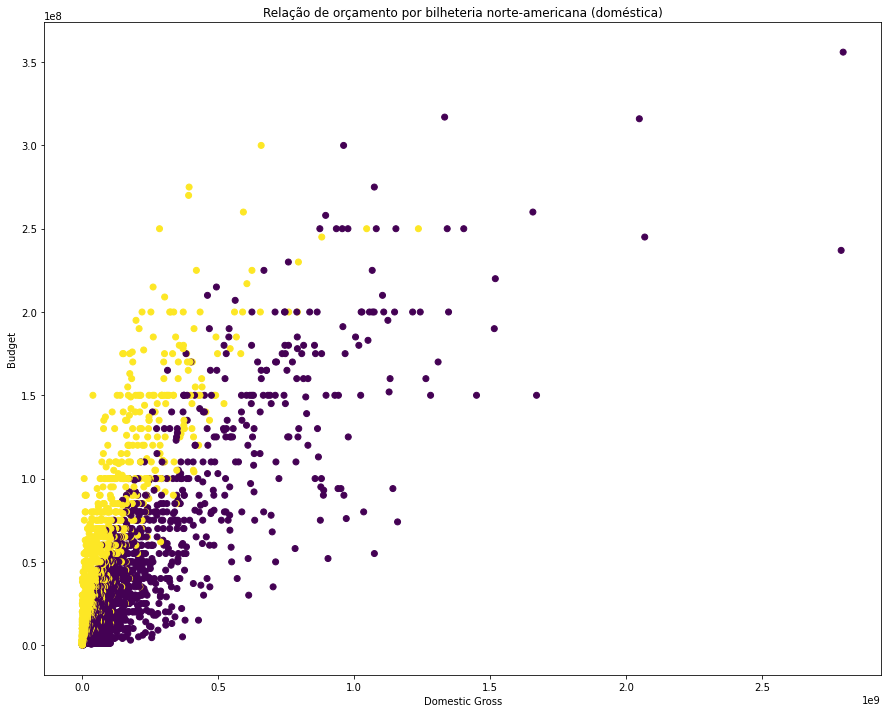

In [136]:
fig = plt.figure(figsize = (15, 12)) 
plt.scatter(filmes_final['worldwide_gross'], filmes_final['budget'], c=filmes_final['isProfitable'])
plt.xlabel("Domestic Gross") 
plt.ylabel("Budget") 
plt.title("Relação de orçamento por bilheteria norte-americana (doméstica)") 
plt.show()

In [137]:
filmes_final = filmes_final.drop(['isProfitable'], axis='columns').copy()